<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Neural Networks

## *Data Science Unit 4 Sprint 2 Assignment 1*

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

### Input Layer:
Like a function/program, an input(data,number,whatever) is provided. It actually touches the raw data, and is therefore visible and not hidden
### Hidden Layer:
A hidden layers is any layer that isn't either an output or an input. This is where the 'black box' stuff occurs. You can also view it as the place where the 'learning' happens. As more epochs (trials) occur, the weights in this layer are manipulated in the same way the pulling levers / pushing buttons allows the network to learn what weightings achieve the best results in the model.
### Output Layer:
The output layer is the result of all the analysis and input layers. The activation function is applied to this layer so in attempt to reach the desired target results
### Neuron:
A node within a neural network. These neurons make up every layer of the neural network and represent data being transformed, depending on the layer that it's in.
### Weight:
 A factor/vector to multiply the inputs by based on the inputs actual correspondence to the correct outcome
### Activation Function:
An activation function, or transfer function, can update weights using back propogation to create a better outcome. An activation function at its core is typically the same throughout all layers of the NN. It determines how much signal to 'transfer' to the next layer by determining if that given node will activate the next portion of a neural network, conrolling how much ifnormation is passed downstream within the network.here are many types such as a stepwise (binary) as well as sigmoid (similar to a logistic regression) and tanh which has a steeper center portion of the curve than the sigmoid
### Perceptron:
The simpliest neural network. A single node with no hidden layers, it can take any number of inputs and at this simplest level looks very similar to linear regression.It has the following properties: (n) inputs, 0 hidden layers, 1 output; goes one direction, left-to-right; inputs multiplied by weight, sum all products and pass sum through activation function and outputs as result.

## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

#### Answer above 

## Write your own perceptron code that can correctly classify (99.0% accuracy) a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [3]:
import pandas as pd
import numpy as np
data = { 'x1': [0,1,0,1],
         'x2': [0,0,1,1],
         'y':  [1,1,1,0]
       }

df = pd.DataFrame.from_dict(data).astype('int')
df

,x1,x2,y
0,0,0,1
1,1,0,1
2,0,1,1
3,1,1,0


In [4]:
#remember, the final column of all 1's represents our "bias" value
inputs = np.array([
    [0,0,1],
    [1,0,1],
    [0,1,1],
    [1,1,0]
])

correct_outputs = [[1],[1],[1],[0]]


In [5]:
#defining our sigmoid functions for our activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    sx = sigmoid(x)
    return sx * (1-sx)

In [6]:
#generating weights between 0 and 1
weights = 2 * np.random.random((3,1)) - 1
weights

array([[ 0.58937111],
       [-0.32476087],
       [ 0.47774362]])

In [7]:
#applying our weights to our input values
weighted_sum = np.dot(inputs,weights) 
weighted_sum

array([[0.47774362],
       [1.06711473],
       [0.15298275],
       [0.74235386]])

In [8]:
#with our weights applied, we can enter our output layer with a sigmoid function
activated_output = sigmoid(weighted_sum)

In [9]:
#then we can find the error on the output and our true values
error = correct_outputs - activated_output
error

array([[ 0.38278508],
       [ 0.25595217],
       [ 0.46182873],
       [-0.67751037]])

In [10]:
#with our error values measured we can make adjustments, using gradient descent and backpropogation
adjustments = error * sigmoid_derivative(activated_output)
adjustments

array([[ 0.08713121],
       [ 0.05588935],
       [ 0.10748486],
       [-0.15133642]])

In [11]:
#with the adjustments determined, we can apply them to our original weights
weights += np.dot(inputs.T,adjustments)
weights

array([[ 0.49392404],
       [-0.36861243],
       [ 0.57691262]])

In [12]:
#now we can iterate across this to increase our accuracy
for iteration in range(10000):
    
    # Weighted sum of inputs / weights
    weighted_sum = np.dot(inputs, weights)
    
    # Activate!
    activated_output = sigmoid(weighted_sum)
    
    # Cac error
    error = correct_outputs - activated_output
    
    adjustments = error * sigmoid_derivative(activated_output)
    
    # Update the Weights
    weights += np.dot(inputs.T, adjustments)
    
print("Weights after training")
print(weights)

print("Output after training")
print(activated_output)

Weights after training
[[-11.839825  ]
 [-11.839825  ]
 [ 17.80860207]]
Output after training
[[0.99999998]
 [0.9974489 ]
 [0.9974489 ]
 [0.00281227]]


## Implement your own Perceptron Class and use it to classify a binary dataset: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [13]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Although neural networks can handle non-normalized data, scaling or normalizing your data will improve your neural network's learning speed. Try to apply the sklearn `MinMaxScaler` or `Normalizer` to your diabetes dataset. 

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

feats = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'bias']
target = 'Outcome'
# introducing bias into familiar machine learning workflows as part of the neural network
diabetes['bias'] = np.ones(diabetes.shape[0])

#converting our pandas dataframe into split numpy arrays into features and target
X = diabetes[feats].to_numpy()
y = diabetes[target].to_numpy()
y = y * 2 - 1

In [15]:
# Although neural networks can handle non-normalized data, 
# scaling or normalizing your data will improve your neural network's learning speed.
# Try to apply the sklearn MinMaxScaler or Normalizer to your diabetes dataset

# we should apply a transformation to our features for more efficient models

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
class Perceptron(object):
    
    def __init__(self, rate = 0.1, niter = 10):
        self.rate = rate
        self.niter = niter
    
    def __sigmoid(self, x):
        return 1 / (1 + np.exp(-X))
    
    def __sigmoid_derivative(self, x):
        sx = self.__sigmoid(X)
        return sx * (1-sx)

    def fit(self, X, y):
        """
        Fit training data
        X : Training vectors, X.shape : [#samples, #features]
        y : Target values, y.shape : [#samples]
        """
        
        # Randomly Initialize Weights
        #assign weights of 0 for the length of features + 1 (bias)
        self.weight = np.zeros(1 + X.shape[1])
        
            
        #initialize errors
        self.errors = []


        for i in range(self.niter):
            #reset errors for function calling
            err = 0
            for xi, target in zip(X, y):
                #for loop that breaks out for each prediction
                
                #the delta for each pass
                delta_w = self.rate * (target - self.predict(xi))
                # Weighted sum of inputs / weights
                self.weight[1:] += delta_w * xi
                self.weight[0] += delta_w
                err += int(delta_w != 0.0)
            self.errors.append(err)
        return self


    def weighted_sum(self, X):
        """Calculate weighted sum of neuron"""
        """The dot product of an input times the weights plus a bias"""
        return np.dot(X, self.weight[1:]) + self.weight[0]

    def predict(self, X):
        """Returns what the class is for the logic gate, 0 or 1 based on if the prediction is above or below 0.5"""
        return np.where(self.weighted_sum(X) >= 0.0, 1, -1)

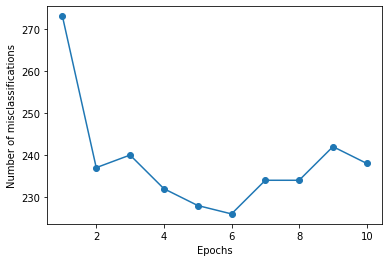

In [21]:
# looks like peak optimization was reached with 6 epochs

#initializating the perceptron class
import matplotlib.pyplot as plt

nn = Perceptron()

#fitting on the diabetes data
nn.fit(X_scaled,y)
plt.plot(range(1, len(nn.errors) + 1), nn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?